In [ ]:
'''
### 배운내용

- 파이썬, Numpy(속도, 편의성), Pandas(High level API)
- 머신러닝 : 교사학습(성능/Y)
           비교사학습(항상 가능, 성능 낮음)
           강화학습(액션/보상) - 어렵고 자원 필요 ....준교사학습/약교사학습
- 교사학습: KNN: k개 이웃 찾기로 분류/회귀
          Linear Regression(선형 회귀), 측: 데이터를 Y = ax+b 등으로 모델링
              > Ridge, Lasso : 파라미터가 커지지 않도록 제약
          Decisoin Tree(결정트리) : 장점 - 시각적, 설명력/ 단점 - 성능 떨어지고 과적합
              > ensenble(2개 이상의 모델 같이 사용) 기법으로 단점 해결
             Random Forest: 서로 다른 Tree 여러개(예를 들어 100개)
                 > 다른 데이터를 나무에 주입 : 부트스트랩, 병렬화 가능
             Gradient Boosting Model
                 > 순차적으로 Tree를 fit, 현재의 loss를 줄이는 다음 tree
             AnaBoost : Adaptive Boost 적응적으로 (성능을) 끌어올리자
                 > 순차적으로 Tree를 fit, 예측이 틀린 샘플을 다음 tree에서 맞추자
           SVM(Support Vector Machine): 일부 벡터만 가지고 분류, 예측
           Neural Network(신경망) : MLP(Multi Layer Perceptron) 히든 레이어 등장 
                                    Y = ax+b  >  Y = dd*(cc*(aaX+bb)+cc)+e+d*(c*(aX+b)+c)+e
- 비교사학습 : 차원축소와 클러스터링
             PCA(Principle Component Analysis: 주성분분석): 주성분-분산이 가장 큰 데이터
             t-SNE: 인접한 특징을 가장 잘 설명하는 새로운 표현 방법을 찾는다.
                    글자 이미지들처럼 선들이 이어져 있을 때 효과적
             k-means: K개로 분류
             군집 알고리즘: 가까운 샘플들끼리 그룹화해 나갑니다.
                            k개 그룹이 될때까지
             DBSCAN : 거리를 정해주면 그 거리안의 샘플들끼리 그룹화해 나갑니다.
- 성능지표, Accuracym Prescision, Recall, ROC 커브, F-score, confusion matrix 등
- 성능 좋은 모델 찾는 법, 텍스트 데이터 다루기
'''


# 5장 모델 평가와 성능 향상

### 교차 검증
- 데이터를 훈련 세트와 테스트 세트로 한번 나누기?
- 여러번 나누자!

In [23]:
import mglearn
import numpy as np

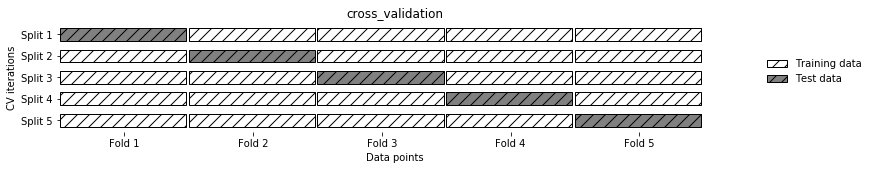

In [2]:
mglearn.plots.plot_cross_validation()

In [3]:
# 325
from sklearn.model_selection import cross_val_score # 소문자로 시작한 cross_val_score 함수
from sklearn.datasets import load_iris # 분류
from sklearn.linear_model import LinearRegression, LogisticRegression # 예측, 분류

In [5]:
iris = load_iris()
iris.data.shape, iris.target.shape # X,Y

((150, 4), (150,))

In [19]:
model = LogisticRegression(solver='lbfgs', multi_class='auto')

In [24]:
scores = cross_val_score(model, iris.data, iris.target, cv = 5) # cv: fold 몇개? 교차검증 몇 번?
scores, np.mean(scores)

C:\Users\wtime\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


(array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ]),
 0.9733333333333334)

In [25]:
from sklearn.model_selection import cross_val_score, cross_validate # score 외의 정보도 출력됩니다.

In [28]:
info = cross_validate(model, iris.data, iris.target, cv = 5, return_train_score='true')

C:\Users\wtime\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [29]:
import pandas as pd
pd.DataFrame(info)

,fit_time,score_time,test_score,train_score
0,0.015390,0.0,0.966667,0.966667
1,0.031243,0.0,1.000000,0.966667
2,0.015655,0.0,0.933333,0.983333
3,0.015614,0.0,0.966667,0.983333
4,0.015617,0.0,1.000000,0.975000


### 그리드 서치

- 파라미터: 모델이 자동으로 fitting, 사람이 정해줘야 하는 파라미터(하이퍼 파라미터: 예 KNN의 k)
- (하이퍼) 파라미터 선정을 위한 서치

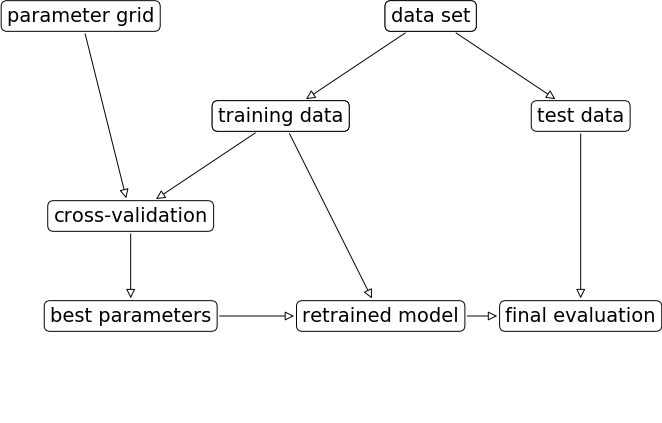

In [31]:
# 342
mglearn.plots.plot_grid_search_overview()

In [76]:
from sklearn.svm import SVC, SVR # 분류/ 예측
model = SVC(C=0.5 ,gamma=0.001)
#model = SVC(C=100 ,gamma=0.01)
# c규제 : 규제가 크다 -> 파라미터를 작게 만든다 -> 모든 특징을 활용해서 예측
# gamma 는 커널의 폭에 해당(폭이 넓으면 느슨하게 분류, 폭이 좁으면 세밀하게 분류)

In [77]:
cross_val_score(model, iris.data, iris.target, cv =5)

array([0.86666667, 0.96666667, 0.83333333, 0.96666667, 0.93333333])

In [38]:
#최적의 C, gamma 값을 찾아보자
C = [0.1, 1, 10, 50, 100]
gamma = [0.001, 0.01, 0.1, 1, 10]

In [46]:
maximum = -1
best_g_c = 0
for g in gamma:
    for c in C:
        model = SVC(C=c ,gamma=g)
        scores = cross_val_score(model, iris.data, iris.target, cv = 5)
        #print('Gamma',g, 'C',c, np.mean(scores))
        if np.mean(scores)> maximum:
            maximum = np.mean(scores)
            best_g_c = (g,c)
print('best_g_c', best_g_c, maximum)

best_g_c (0.01, 50) 0.9866666666666667


### ==========================================================

### ==========================================================

In [51]:
#343 모델의 성능 가산점 90%, 95%
from sklearn.model_selection import GridSearchCV

In [132]:
param_grid = {'C': [0.1, 1, 10, 50, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10]} #dict
grid_search = GridSearchCV(SVC(), param_grid, return_train_score=True)

In [133]:
grid_search = grid_search.fit(iris.data, iris.target)

C:\Users\wtime\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\wtime\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [134]:
grid_search.best_estimator_  # 최적의 하이퍼파라미터

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [135]:
df = pd.DataFrame(grid_search.cv_results_)
df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.0,0.0,0.0,0.0,0.1,0.001,"{'C': 0.1, 'gamma': 0.001}",0.901961,0.901961,0.937500,0.913333,0.016578,22,0.919192,0.949495,0.892157,0.920281,0.023421
1,0.0,0.0,0.0,0.0,0.1,0.01,"{'C': 0.1, 'gamma': 0.01}",0.901961,0.901961,0.937500,0.913333,0.016578,22,0.919192,0.949495,0.892157,0.920281,0.023421
2,0.0,0.0,0.0,0.0,0.1,0.1,"{'C': 0.1, 'gamma': 0.1}",0.921569,0.921569,0.937500,0.926667,0.007432,21,0.939394,0.959596,0.892157,0.930382,0.028260
3,0.0,0.0,0.0,0.0,0.1,1,"{'C': 0.1, 'gamma': 1}",0.960784,0.960784,0.979167,0.966667,0.008575,9,0.969697,0.989899,0.931373,0.963656,0.024272
4,0.0,0.0,0.0,0.0,0.1,10,"{'C': 0.1, 'gamma': 10}",0.686275,0.705882,0.916667,0.766667,0.103216,25,0.848485,0.909091,0.911765,0.889780,0.029221


In [136]:
df.shape

(25, 18)

In [137]:
# 347 그리드 서치 성능을 그림으로
scores = np.array(df['mean_test_score']).reshape(5,5)

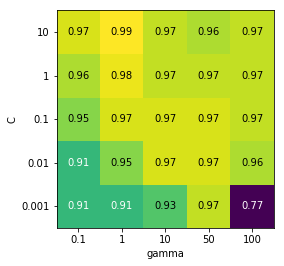

In [141]:
p= mglearn.tools.heatmap(scores, xlabel='gamma', ylabel='C'
                       , xticklabels = param_grid['C'], yticklabels=param_grid['gamma'])

In [153]:
from sklearn.tree import DecisionTreeClassifier
param_grid = {'max_depth': [1, 2, 3, 4, 5, 6], 'min_samples_split': [0.5, 1.0] } 
#max_depth 최대 높이, 최소 몇개의 샘플이 있어야 분기되느냐(나뭇 가지 edge 가 나뉘느냐)
gird_search = GridSearchCV(DecisionTreeClassifier(), param_grid, return_train_score=True)
gird_search = gird_search.fit(iris.data, iris.target)

C:\Users\wtime\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\wtime\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [154]:
grid_search.best_estimator_  # 최적의 하이퍼파라미터

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=0.5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [155]:
df = pd.DataFrame(grid_search.cv_results_)

In [156]:
df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.0,0.0,0.0,0.0,2,0.5,"{'max_depth': 2, 'min_samples_split': 0.5}",0.960784,0.901961,0.979167,0.946667,0.032944,1,0.949495,0.989899,0.950980,0.963458,0.018706
1,0.0,0.0,0.0,0.0,2,1,"{'max_depth': 2, 'min_samples_split': 1.0}",0.666667,0.666667,0.666667,0.666667,0.000000,6,0.666667,0.666667,0.666667,0.666667,0.000000
2,0.0,0.0,0.0,0.0,3,0.5,"{'max_depth': 3, 'min_samples_split': 0.5}",0.960784,0.901961,0.979167,0.946667,0.032944,1,0.949495,0.989899,0.950980,0.963458,0.018706
3,0.0,0.0,0.0,0.0,3,1,"{'max_depth': 3, 'min_samples_split': 1.0}",0.666667,0.666667,0.666667,0.666667,0.000000,6,0.666667,0.666667,0.666667,0.666667,0.000000
4,0.0,0.0,0.0,0.0,4,0.5,"{'max_depth': 4, 'min_samples_split': 0.5}",0.960784,0.901961,0.979167,0.946667,0.032944,1,0.949495,0.989899,0.950980,0.963458,0.018706


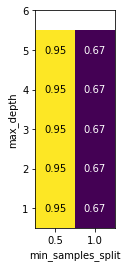

In [157]:
scores = np.array(df['mean_test_score']).reshape(-1,2)
p = mglearn.tools.heatmap(scores, xlabel='min_samples_split', ylabel='max_depth',
                      xticklabels=param_grid['min_samples_split'], yticklabels=param_grid['max_depth'])

## 에러의 종류
- 분류: 정확도 accuracy + 오차 행렬(TP, TN, FP, FN) > 정밀도(precision)와 재현율(recall) > 조화평균(F-score)
- 회귀: 결정계수 R^2, Absoluste Loss(L1)

#### 너목보 목표: 노래 잘부르는 사람 찾기
- 노래 잘부르는 사람 Y = 1 보통 30%
- 노래 못부르는 사람 Y = 0

In [91]:
Y = [0, 1, 0, 0, 1, 0] # 0은 음치, 1은 노래 잘 부른다

In [92]:
p1 = [0, 0, 0, 1, 1, 1]
p2 = [0, 0, 0, 0, 0, 1]
p3 = [0, 1, 0, 1, 1, 1]

In [93]:
Y = np.array(Y)
p1 = np.array(p1)
p2 = np.array(p2)
p3 = np.array(p3)

누가 제일 정확하게 예측했습니까?

In [94]:
np.mean(Y==p1), np.mean(Y==p2), np.mean(Y==p3)

(0.5, 0.5, 0.6666666666666666)

### => 클래스 불균형 상황에서는 정확도를 사용하면 안됩니다.
### => 정밀도(precision)와 재현율(recall) > 조화평균(F-score) 을 써야함

In [95]:
# metrics: 성능지표
from sklearn.metrics import classification_report

In [100]:
print(classification_report(Y, p1, target_names=['음치','가수']))
#  precision    recall    f1-score   support
#   정밀도      재현율      평균      샘플수

              precision    recall  f1-score   support

          음치       0.67      0.50      0.57         4
          가수       0.33      0.50      0.40         2

   micro avg       0.50      0.50      0.50         6
   macro avg       0.50      0.50      0.49         6
weighted avg       0.56      0.50      0.51         6



In [101]:
print(classification_report(Y, p2, target_names=['음치','가수']))

              precision    recall  f1-score   support

          음치       0.60      0.75      0.67         4
          가수       0.00      0.00      0.00         2

   micro avg       0.50      0.50      0.50         6
   macro avg       0.30      0.38      0.33         6
weighted avg       0.40      0.50      0.44         6



In [102]:
print(classification_report(Y, p3, target_names=['음치','가수']))

              precision    recall  f1-score   support

          음치       1.00      0.50      0.67         4
          가수       0.50      1.00      0.67         2

   micro avg       0.67      0.67      0.67         6
   macro avg       0.75      0.75      0.67         6
weighted avg       0.83      0.67      0.67         6



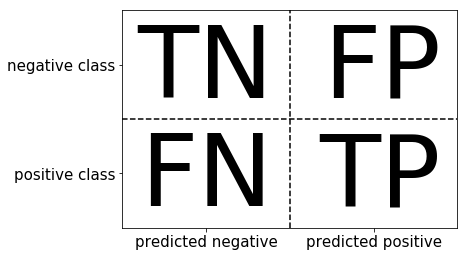

In [104]:
# 362 confusion : 오차/혼동 - 오차행렬, 혼동렬
mglearn.plots.plot_binary_confusion_matrix()

- True 예측이 맞다
- False 예측이 틀렸다
- Positive 예측 타겟이다
- Negative 예측 타겟이 아니다
- 
- TN: 음치를 음치라고 예측한 샘플 수
- FN: 가수를 음치라고 예측한 샘플 수
- TP: 가수를 가수라고 예측한 샘플 수
- FP: 음치를 가수라고 예측한 샘플 수

- 정확도(Accyracy) = TP + TN / (TP + TN + FP + FN) - 클래스 균형
- 정밀도(Precision) = TP / (TP + FP) -> 예측이 얼마나 정확하나
- 재현율(Recall) = TP / (TP + FN)  * 민감도(통계: sensitivity), 적중률(hirate), 진짜 양성 비율
-                  -> 타겟을 몇 퍼센트나 찾았나 ***
- F-score: 2*정밀도*재현율

In [105]:
# 361
from sklearn.metrics import confusion_matrix

In [108]:
Y, p1

(array([0, 1, 0, 0, 1, 0]), array([0, 0, 0, 1, 1, 1]))

In [107]:
print(confusion_matrix(Y, p1))

[[2 2]
 [1 1]]


정밀도-재현율 곡선과 ROC 곡선, 멀티 클래스에서의 혼동 행렬

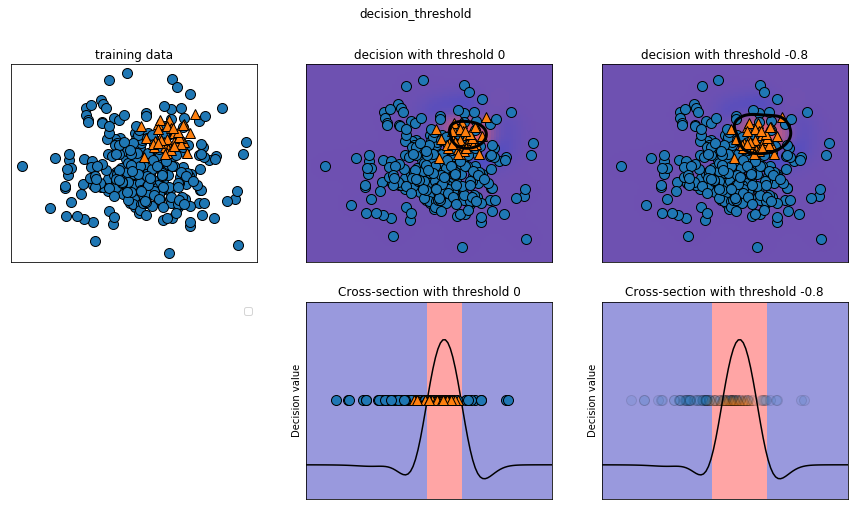

In [110]:
# 368
mglearn.plots.plot_decision_threshold()

In [111]:
# 373
#digits
from sklearn.datasets import load_digits

In [113]:
digit = load_digits()

In [115]:
digit.data.shape, digit.target.shape, digit.target_names # X, Y

((1797, 64), (1797,), array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

# 데이터 분리 없이 전부 Logistic Regression 으로 fit, score 측정

In [117]:
x, y = digit.data, digit.target
model = LogisticRegression().fit(x,y)
model.score(x,y)

C:\Users\wtime\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\wtime\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.993322203672788

In [118]:
# 382 혼동행렬
from sklearn.metrics import confusion_matrix

In [119]:
cm = confusion_matrix(y, model.predict(x))
print(cm)

[[178   0   0   0   0   0   0   0   0   0]
 [  0 179   0   1   0   0   0   0   2   0]
 [  0   0 177   0   0   0   0   0   0   0]
 [  0   0   0 183   0   0   0   0   0   0]
 [  0   0   0   0 181   0   0   0   0   0]
 [  0   0   0   0   0 182   0   0   0   0]
 [  0   0   0   0   0   0 181   0   0   0]
 [  0   0   0   0   0   0   0 179   0   0]
 [  0   5   0   1   0   0   0   0 168   0]
 [  0   0   0   1   0   0   0   0   2 177]]


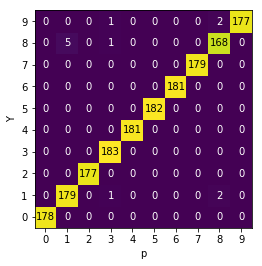

In [159]:
mglearn.tools.heatmap(cm, xlabel='p', ylabel='Y', 
                      xticklabels=digit.target_names, yticklabels=digit.target_names, fmt='%d')